In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [204]:
data=pd.read_csv('cardio_train.csv',sep=';',header=0)

In [205]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [206]:
data=data.dropna()

In [207]:
print(data.shape)

(70000, 13)


In [208]:
print(data.columns)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [209]:
len(data.columns)

13

In [250]:
data.drop(columns=['id'])

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,19834,1,164,68.0,110,60,1,1,0,0,0,0


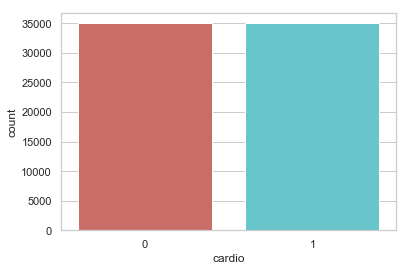

In [251]:
data.cardio.value_counts()
sns.countplot(x = 'cardio', data = data, palette = 'hls')
plt.show()

In [252]:
X=data[[
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active']]
y=data['cardio']


In [273]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [274]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [598]:
y_pred=(logreg.predict_proba(X_test)[:,1] >= 0.53).astype(bool)
y_pred

array([False, False, False, ...,  True, False,  True])

In [599]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[5598, 1471],
       [2674, 4257]], dtype=int64)

In [600]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7039285714285715
Precision: 0.7431913407821229
Recall: 0.6141970855576396


In [601]:
d={'age':[16060], 'gender':[1], 'height':[157], 'weight':[69.0], 'ap_hi':[120], 'ap_lo':[62],
       'cholesterol':[2], 'gluc':[1], 'smoke':[0], 'alco':[0], 'active':[1]}
df = pd.DataFrame(data=d)

In [602]:
logreg.predict(df)

array([0], dtype=int64)